In [1]:
%pylab inline
rcParams['font.size']=18

Populating the interactive namespace from numpy and matplotlib


# Create some synthetic timeseries to test
  * Two independent white noise processes: ts1 and ts2
  * A red noise process similar to what we see from the mm-wave source: red
  * a couple of "lines" like from the compressor: lines
  * A rolled off white noise like from the device: device

In [2]:
ts1 = np.random.randn(2**18).astype('complex')
ts2 = np.random.randn(2**18).astype('complex')
f = np.fft.fftfreq(2**18)[:2**17+1]
redf = (f**(-0.5))*np.exp(1j*np.random.rand(2**17+1)*2*np.pi)
redf[0] = 0
redf[-1] = 0
red = np.fft.irfft(redf)
linesf = np.zeros_like(redf)
line_amp = 1e4
phases = np.exp(1j*np.random.rand(8)*2*np.pi)
for k in range(1):
    linesf[k+550*np.arange(1,9,dtype='int')]= line_amp*phases/(np.arange(1,9))
#linesf[551*np.arange(1,9,dtype='int')]= line_amp*.9/np.arange(1,9)

lines = np.fft.irfft(linesf)

devf = np.zeros_like(redf)
devf = np.exp(1j*np.random.rand(2**17+1)*2*np.pi)*np.sqrt(1/(1+(f*16)**2))
devf[0] = 0
devf[-1] = 0
device = np.fft.irfft(devf)*1e3

/home/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in power
/home/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: invalid value encountered in power


# Look at the device noise spectrum

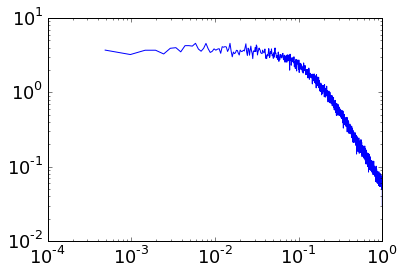

In [3]:
pxx,fr =  mlab.psd((device+ts1/1000.).real,NFFT=2**12)
loglog(fr,pxx)

And timeseries

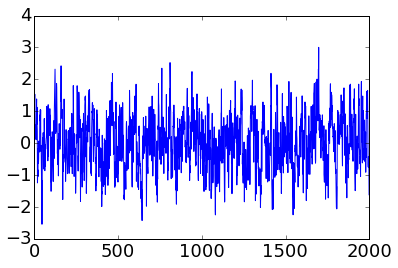

In [4]:
plot(device[:2000])

#Red noise time series and spectrum

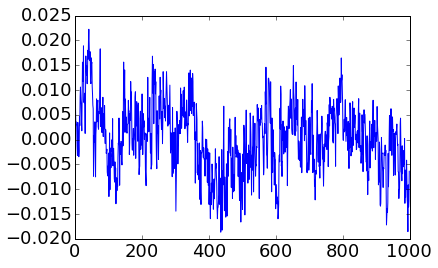

In [5]:
plot(red[:1000])

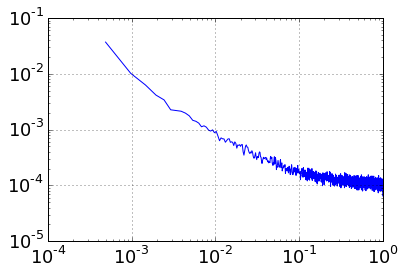

In [6]:
pxx,fr = mlab.psd((red+ts1/100).real,NFFT=2**12)
loglog(fr,pxx)
grid()

In [7]:
import kid_readout.analysis.cross_spectrum
reload(kid_readout.analysis.cross_spectrum)

<module 'kid_readout.analysis.cross_spectrum' from '/home/gjones/readout/kid_readout/kid_readout/analysis/cross_spectrum.pyc'>

# Cross correlate two independent time series, to check for null result

0.249338958841


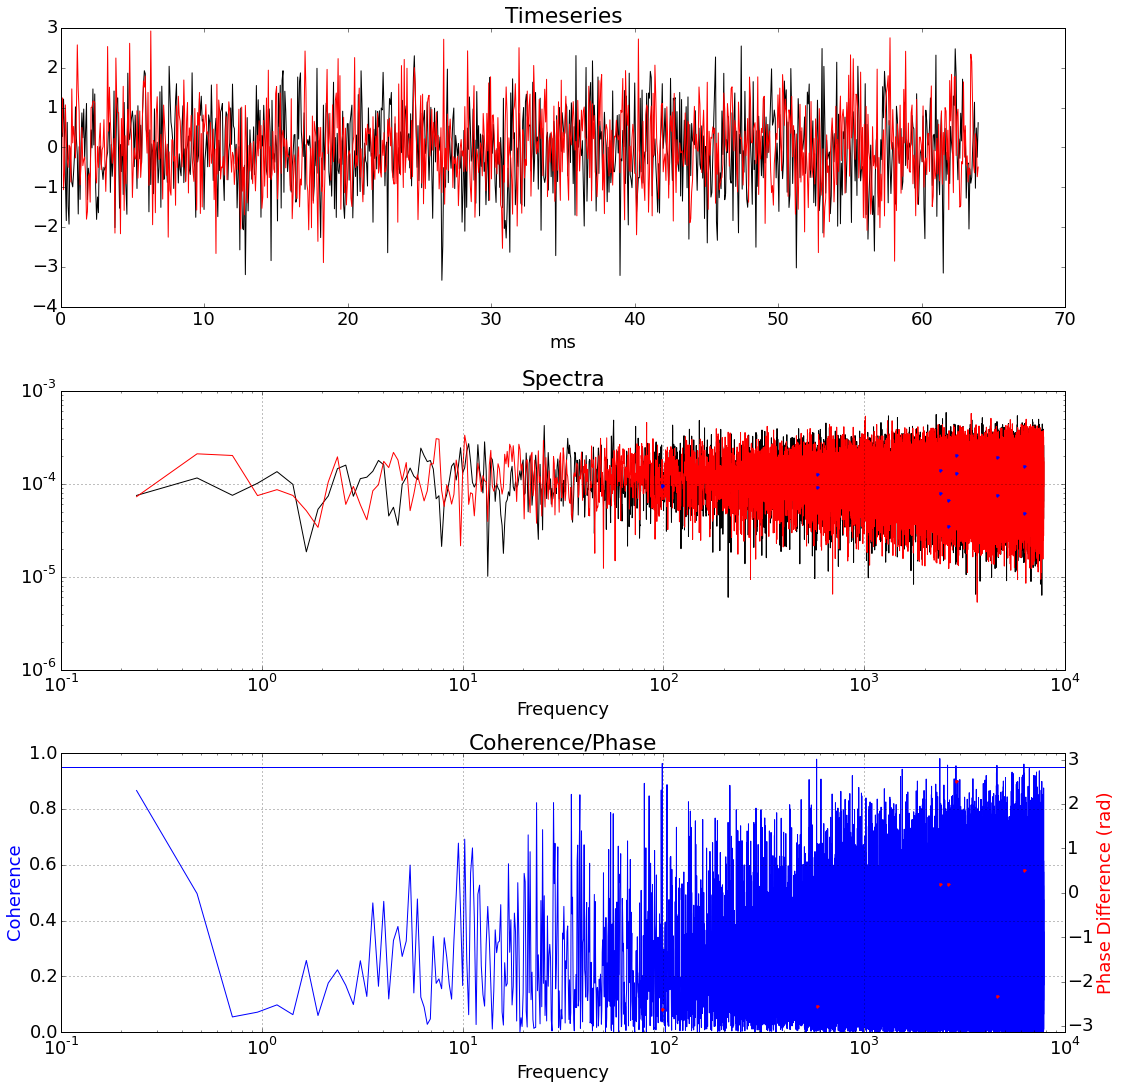

In [8]:
cs = kid_readout.analysis.cross_spectrum.CrossSpectralAnalysis()
cs.get_data_directly(ts1,ts2)
cs.plot()

# Add correlated red noise process

0.2572289464


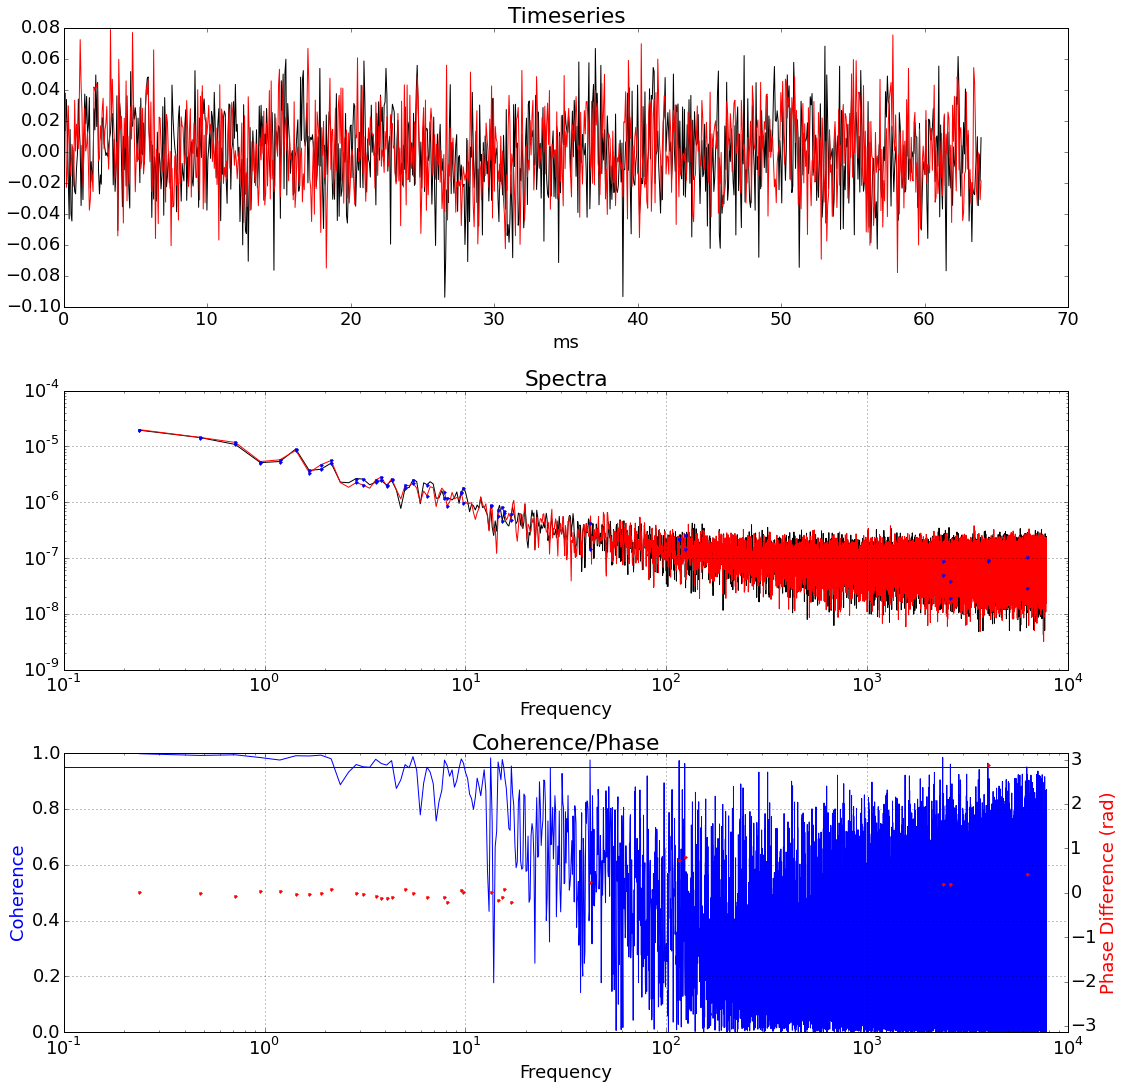

In [9]:
cs = kid_readout.analysis.cross_spectrum.CrossSpectralAnalysis()
cs.get_data_directly(red+ts1/40.,red+ts2/40.)
cs.plot()

#Same as above but change spectral bin size

0.2572289464
0.027130689875


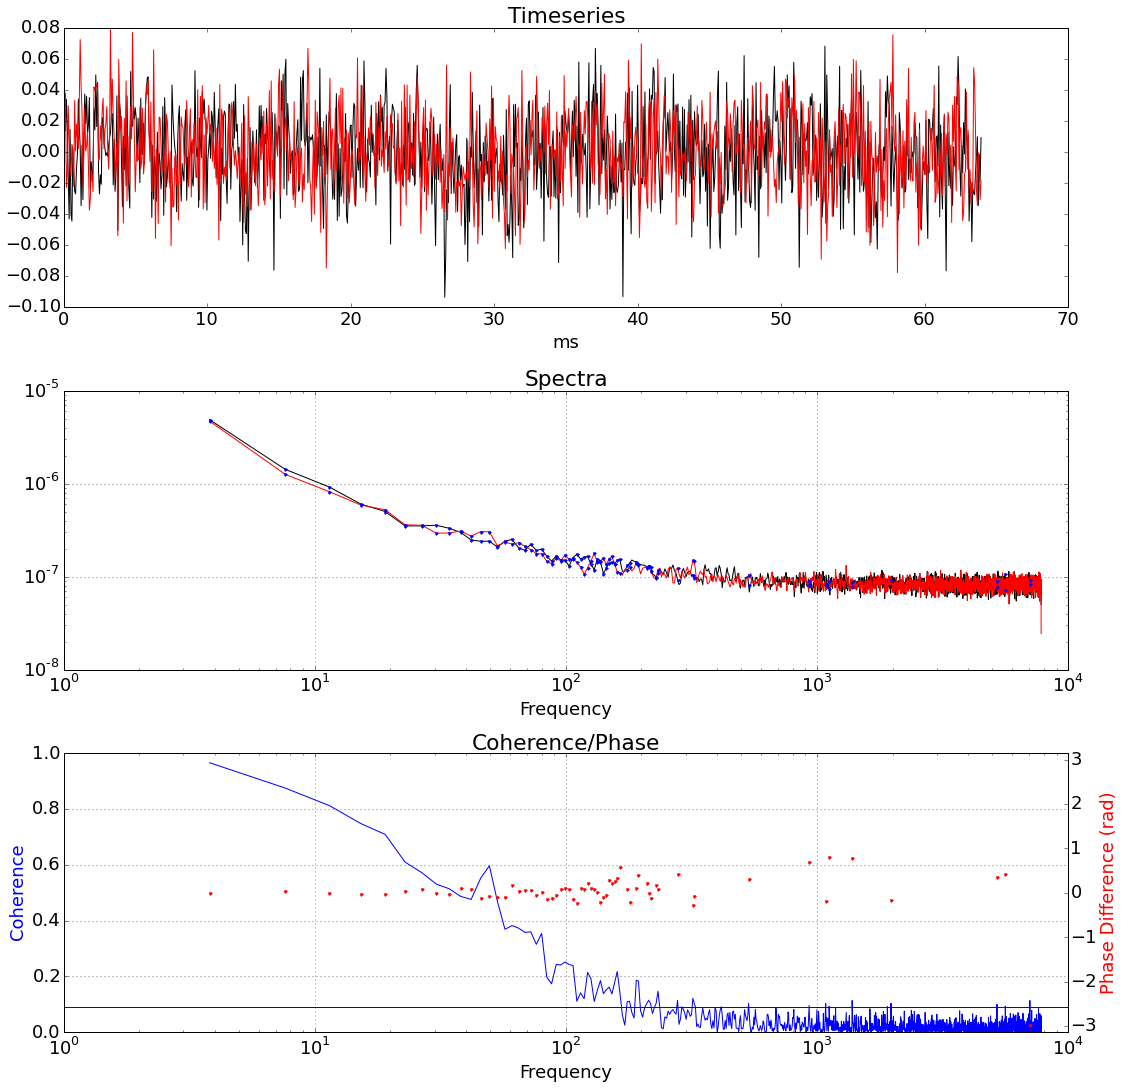

In [10]:
cs = kid_readout.analysis.cross_spectrum.CrossSpectralAnalysis()
cs.get_data_directly(red+ts1/40.,red+ts2/40.)
cs.calculate(NFFT=2**12)
cs.plot()

#Add some pulse-tube like line features

0.257591596261
0.0303177640504


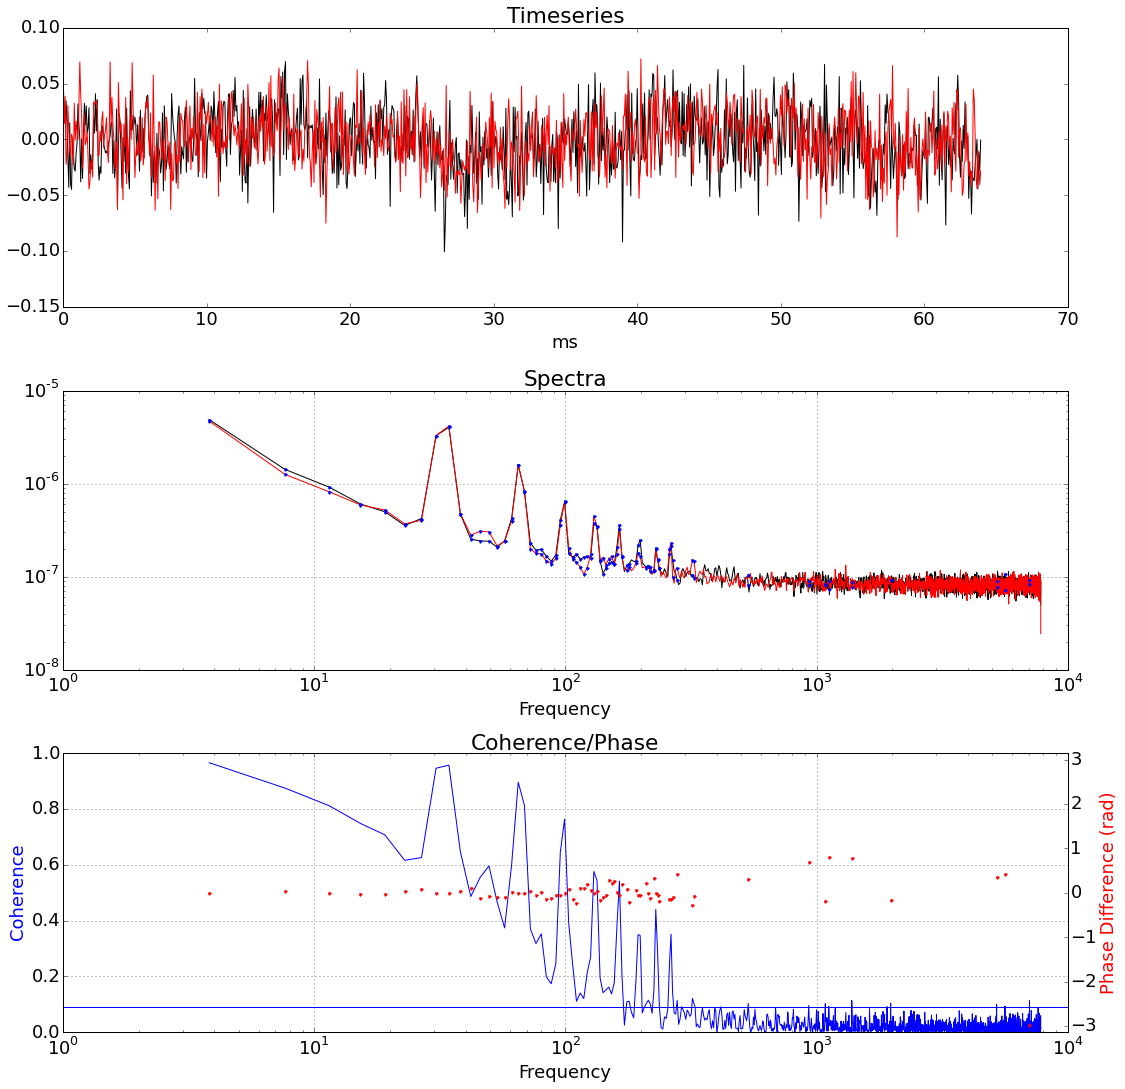

In [11]:
cs = kid_readout.analysis.cross_spectrum.CrossSpectralAnalysis()
cs.get_data_directly(red+lines/10.+ts1/40.,red+lines/10.+ts2/40.)
cs.calculate(NFFT=2**12)
cs.plot()

#Add a delay to one of the red noise signals to show that we can track the relative phase

0.257629537105
0.0271178106802


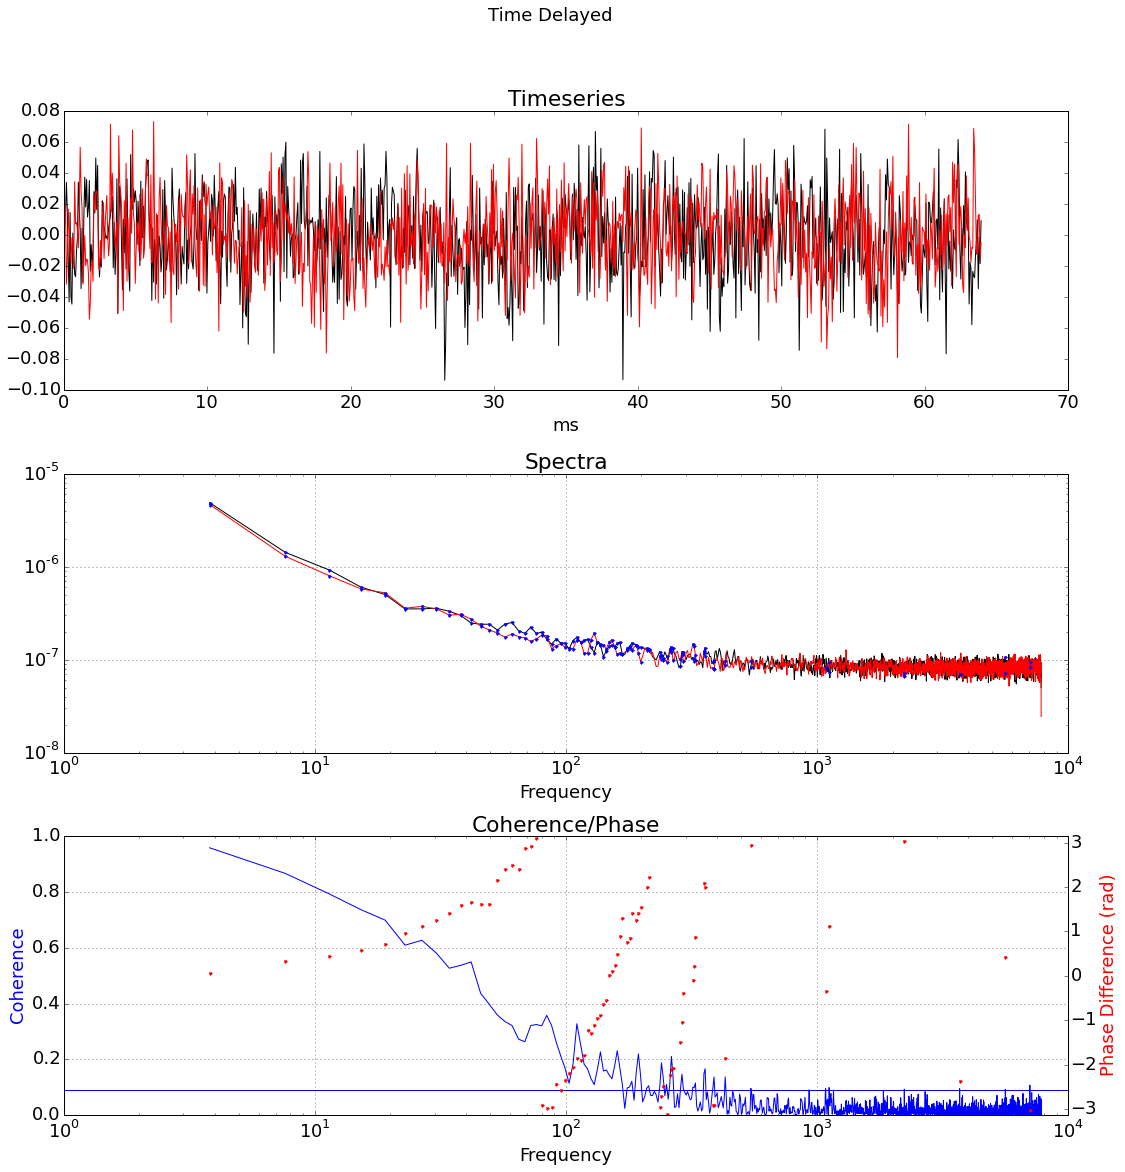

In [12]:
cs = kid_readout.analysis.cross_spectrum.CrossSpectralAnalysis()
cs.get_data_directly(red+ts1/40.,np.roll(red,-100)+ts2/40.)
cs.calculate(NFFT=2**12)
cs.plot()
suptitle('Time Delayed')

# Look at correlated device noise

0.337696579426
0.147039280661


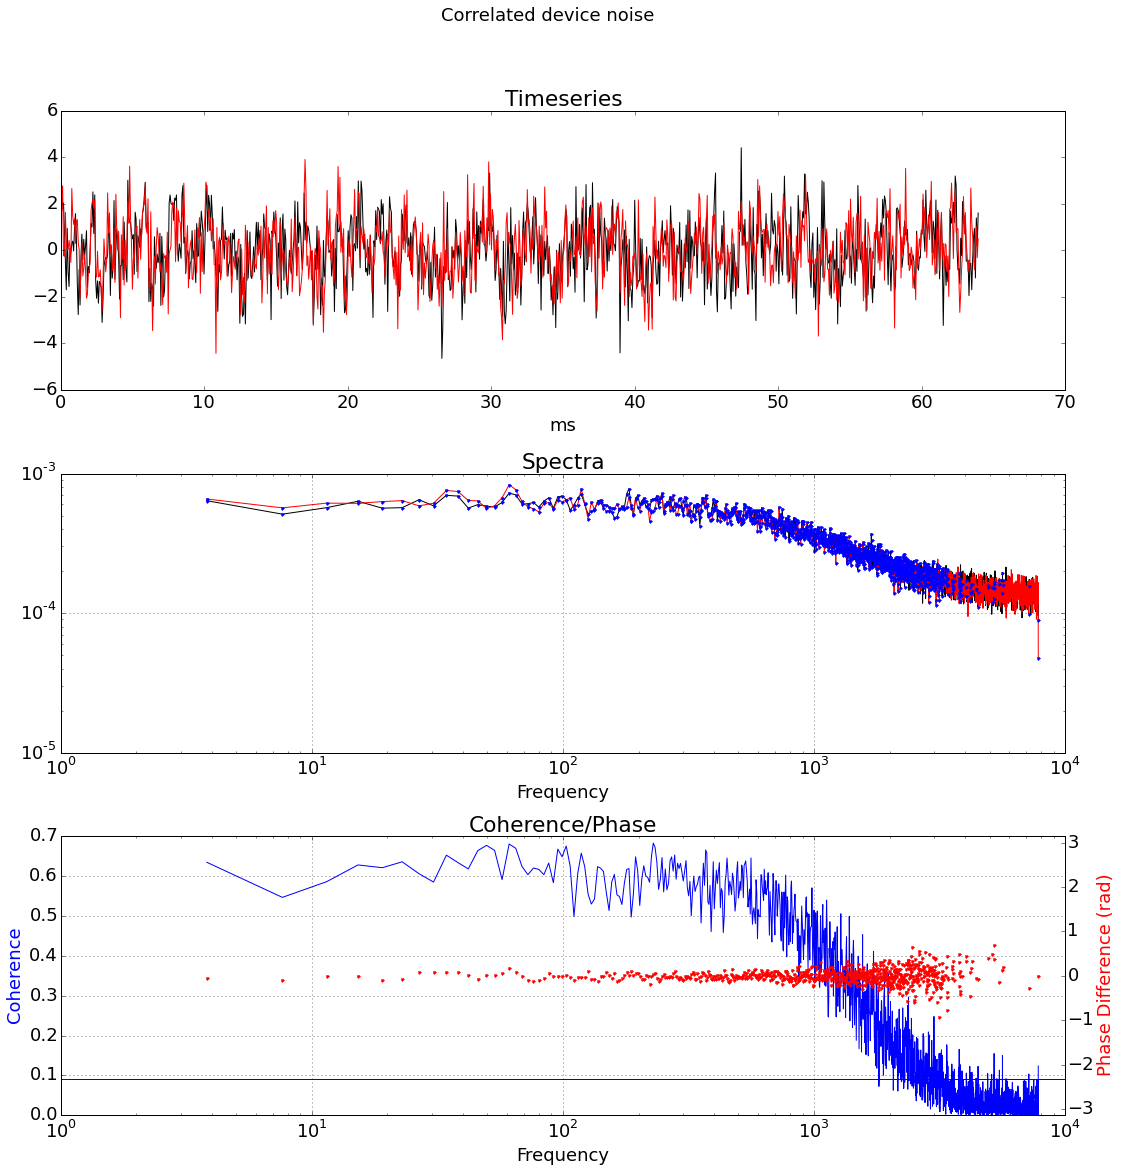

In [13]:
cs = kid_readout.analysis.cross_spectrum.CrossSpectralAnalysis()
cs.get_data_directly(device+ts1,device+ts2)
cs.calculate(NFFT=2**12)
cs.plot()
suptitle('Correlated device noise')